In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image
from pathlib import Path
from matplotlib.patches import Rectangle
from scipy.io import loadmat

In [5]:
devkit_path = Path('C:/Users/Simon Kianzad/CBS/DSBA/Car_img/car_devkit/devkit')
train_path = Path('C:/Users/Simon Kianzad/CBS/DSBA/Car_img/cars_train/cars_train')
test_path = Path('C:/Users/Simon Kianzad/CBS/DSBA/Car_img/cars_test/cars_test')
main_path = Path('C:/Users/Simon Kianzad/CBS/DSBA/Car_img')

In [6]:
os.listdir(devkit_path)

['cars_meta.mat',
 'cars_test_annos.mat',
 'cars_train_annos.mat',
 'eval_train.m',
 'README.txt',
 'train_perfect_preds.txt']

In [7]:
cars_meta = loadmat(devkit_path/'cars_meta.mat')
cars_test_annos = loadmat(devkit_path/'cars_test_annos.mat')
cars_train_annos = loadmat(devkit_path/'cars_train_annos.mat')

# README.txt


## This file gives documentation for the cars 196 dataset.
(http://ai.stanford.edu/~jkrause/cars/car_dataset.html)

----------------------------------------
Metadata/Annotations
----------------------------------------
Descriptions of the files are as follows:

-cars_meta.mat:
  Contains a cell array of class names, one for each class.

-cars_train_annos.mat:
  Contains the variable 'annotations', which is a struct array of length
  num_images and where each element has the fields:
    bbox_x1: Min x-value of the bounding box, in pixels
    bbox_x2: Max x-value of the bounding box, in pixels
    bbox_y1: Min y-value of the bounding box, in pixels
    bbox_y2: Max y-value of the bounding box, in pixels
    class: Integral id of the class the image belongs to.
    fname: Filename of the image within the folder of images.

-cars_test_annos.mat:
  Same format as 'cars_train_annos.mat', except the class is not provided.

----------------------------------------
Submission file format
----------------------------------------
Files for submission should be .txt files with the class prediction for
image M on line M. Note that image M corresponds to the Mth annotation in
the provided annotation file. An example of a file in this format is
train_perfect_preds.txt

Included in the devkit are a script for evaluating training accuracy,
eval_train.m. Usage is:

(in MATLAB)
>> [accuracy, confusion_matrix] = eval_train('train_perfect_preds.txt')

If your training predictions work with this function then your testing
predictions should be good to go for the evaluation server, assuming
that they're in the same format as your training predictions.


In [8]:
labels = [column for column in cars_meta['class_names'][0]]
labels = pd.DataFrame(labels, columns=['labels'])
labels.head()

,labels
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [9]:
cars_train_annos['annotations']

array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
        ...,
        (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
        (array([[78]], dtype=uint8), array([[526]], dtype=uint16), array([[1489]], dtype=uint16), array([[908]], dtype=uint16), array([[112]], dtype=uint8), array(['08143.jpg'], dtype='<U9')),
        (array([[20]], dtype=uint8

In [10]:
annotations = cars_train_annos['annotations']
annotations = np.transpose(annotations)

fnames = []
bboxes = []

for annotation in annotations:
    bbox_x1 = annotation[0][0][0][0]
    bbox_y1 = annotation[0][1][0][0]
    bbox_x2 = annotation[0][2][0][0]
    bbox_y2 = annotation[0][3][0][0]
    fname = annotation[0][5][0]
    car_class = annotation[0][4][0]
    bboxes.append((fname,bbox_x1, bbox_x2, bbox_y1, bbox_y2, int(list(car_class)[0])))
    
    
df_train = pd.DataFrame(bboxes, columns = ['fnames','bbox_x1', 'bbox_x2', 'bbox_y1', 'bbox_y2','car_class'])

df_train

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2,car_class
0,00001.jpg,39,569,116,375,14
1,00002.jpg,36,868,116,587,3
2,00003.jpg,85,601,109,381,91
3,00004.jpg,621,1484,393,1096,134
4,00005.jpg,14,133,36,99,106
...,...,...,...,...,...,...
8139,08140.jpg,3,423,44,336,78
8140,08141.jpg,138,706,150,523,196
8141,08142.jpg,26,660,246,449,163
8142,08143.jpg,78,1489,526,908,112


In [11]:
df_train = df_train.merge(labels, left_on='car_class', right_index=True)
df_train = df_train.sort_index()
df_train

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2,car_class,labels
0,00001.jpg,39,569,116,375,14,Audi R8 Coupe 2012
1,00002.jpg,36,868,116,587,3,Acura TL Type-S 2008
2,00003.jpg,85,601,109,381,91,Dodge Magnum Wagon 2008
3,00004.jpg,621,1484,393,1096,134,Hyundai Elantra Sedan 2007
4,00005.jpg,14,133,36,99,106,Ford Mustang Convertible 2007
...,...,...,...,...,...,...,...
8138,08139.jpg,117,583,84,403,188,Toyota 4Runner SUV 2012
8139,08140.jpg,3,423,44,336,78,Chrysler 300 SRT-8 2010
8141,08142.jpg,26,660,246,449,163,Mercedes-Benz E-Class Sedan 2012
8142,08143.jpg,78,1489,526,908,112,Ford F-150 Regular Cab 2012


In [12]:
df_train.isnull().sum()

fnames       0
bbox_x1      0
bbox_x2      0
bbox_y1      0
bbox_y2      0
car_class    0
labels       0
dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8104 entries, 0 to 8143
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fnames     8104 non-null   object
 1   bbox_x1    8104 non-null   int16 
 2   bbox_x2    8104 non-null   int16 
 3   bbox_y1    8104 non-null   int16 
 4   bbox_y2    8104 non-null   int16 
 5   car_class  8104 non-null   int64 
 6   labels     8104 non-null   object
dtypes: int16(4), int64(1), object(2)
memory usage: 316.6+ KB


In [14]:
annotations = cars_test_annos['annotations']
annotations = np.transpose(annotations)

fnames = []
bboxes = []

for annotation in annotations:
    bbox_x1 = annotation[0][0][0][0]
    bbox_y1 = annotation[0][1][0][0]
    bbox_x2 = annotation[0][2][0][0]
    bbox_y2 = annotation[0][3][0][0]
    fname = annotation[0][4][0]
    bboxes.append((fname,bbox_x1, bbox_x2, bbox_y1, bbox_y2))
    
    
df_test = pd.DataFrame(bboxes, columns = ['fnames','bbox_x1', 'bbox_x2', 'bbox_y1', 'bbox_y2'])

df_test

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2
0,00001.jpg,30,246,52,147
1,00002.jpg,100,576,19,203
2,00003.jpg,51,968,105,659
3,00004.jpg,67,581,84,407
4,00005.jpg,140,593,151,339
...,...,...,...,...,...
8036,08037.jpg,49,1169,57,669
8037,08038.jpg,23,640,18,459
8038,08039.jpg,33,602,27,252
8039,08040.jpg,33,521,142,376


In [15]:
df_test.isnull().sum()

fnames     0
bbox_x1    0
bbox_x2    0
bbox_y1    0
bbox_y2    0
dtype: int64

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fnames   8041 non-null   object
 1   bbox_x1  8041 non-null   int16 
 2   bbox_x2  8041 non-null   int16 
 3   bbox_y1  8041 non-null   int16 
 4   bbox_y2  8041 non-null   int16 
dtypes: int16(4), object(1)
memory usage: 125.8+ KB


In [86]:
def get_assets(car, i=0):
    print("You've searched for: " + car.title())
    folder = train_path
    os.chdir(folder)
    search = df_train.index[df_train['labels']==car].tolist()
    if not search:
        title = ''
        image = Image.open(main_path/'Image_not_available.png')
    else:
        search = search[i]
        image = Image.open(df_train['fnames'][search])
        title = df_train['labels'][search].title()
    folder = train_path
    os.chdir(folder)
    
    return (image, title)

In [108]:
def display_image(car, i=0):
    image, title = get_assets(car, i)

    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    os.chdir(main_path)

In [109]:
df_train['labels'] = df_train['labels'].str.lower()
df_train

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2,car_class,labels
0,00001.jpg,39,569,116,375,14,audi r8 coupe 2012
1,00002.jpg,36,868,116,587,3,acura tl type-s 2008
2,00003.jpg,85,601,109,381,91,dodge magnum wagon 2008
3,00004.jpg,621,1484,393,1096,134,hyundai elantra sedan 2007
4,00005.jpg,14,133,36,99,106,ford mustang convertible 2007
...,...,...,...,...,...,...,...
8138,08139.jpg,117,583,84,403,188,toyota 4runner suv 2012
8139,08140.jpg,3,423,44,336,78,chrysler 300 srt-8 2010
8141,08142.jpg,26,660,246,449,163,mercedes-benz e-class sedan 2012
8142,08143.jpg,78,1489,526,908,112,ford f-150 regular cab 2012


You've searched for: Ford F-150 Regular Cab 2012


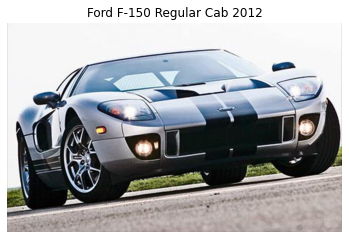

In [114]:
display_image('ford f-150 regular cab 2012'.lower(),0)

In [111]:
df_train['labels'].nunique()

195